In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split #used for spliting dataset into training and testing
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
#reading data in csv file and creating a dataframe
csv_df=pd.read_csv("/content/gdrive/MyDrive/Project/house/data.csv")
csv_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
 csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
csv_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Steps
# 1) csv_df.info()
# 2) csv_df['column_name'].value_counts()
# 3) csv_df.describe()
# 4) csv_df.hist(bins=50,figsize=(20,10))
## Here we also seperate our data into features and labels to simplify the process of splitting
labels_data=csv_df['MEDV'].copy(deep=True)
features_data=csv_df.drop('MEDV',axis=1).copy(deep=True)

In [7]:
#here we done stratified sampling on the basis of 'CHAS' feature
features,features_test,labels,labels_test=train_test_split(features_data,labels_data,test_size=0.2,train_size=0.8,random_state=42,shuffle=True,stratify=features_data['CHAS'])
X_test=features_test.to_numpy()
Y_test=labels_test.to_numpy()
#From here on we do not touch our test datas we only work on our trianing data

"\nfrom pandas.plotting import scatter_matrix\n#its better that you use attributes and see plots and then change items in it and again see plots its better otherwise we can see heatmap\nattributes=['CRIM','RM','AGE','MEDV']\nscatter_matrix(fulldata_train[attributes],alpha=0.8,figsize=(12,10))\nplt.show()\n"

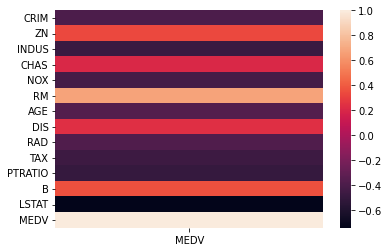

In [8]:
# We also created a fulldata_train by adding features and labels for future operations
fulldata_train=features.join(labels).copy(deep=True)
#finding and plottinf correlation matrix
corr_matrix=fulldata_train.corr()
#heatmap plotting using seaborn

import seaborn as sns
sns.heatmap(corr_matrix.loc[:,'MEDV':])

#scatter_matrix plotting using pandas.plotting
'''
from pandas.plotting import scatter_matrix
#its better that you use attributes and see plots and then change items in it and again see plots its better otherwise we can see heatmap
attributes=['CRIM','RM','AGE','MEDV']
scatter_matrix(fulldata_train[attributes],alpha=0.8,figsize=(12,10))
plt.show()
'''

In [9]:
'''
# we can do this in pipeline
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(fulldata_train)
imputed_array=imputer.transform(fulldata_train)
tranformed_df=pd.DataFrame(imputed_array,columns=fulldata_train.columns)
'''

'\n# we can do this in pipeline\nfrom sklearn.impute import SimpleImputer\nimputer=SimpleImputer(strategy="median")\nimputer.fit(fulldata_train)\nimputed_array=imputer.transform(fulldata_train)\ntranformed_df=pd.DataFrame(imputed_array,columns=fulldata_train.columns)\n'

In [10]:
# We will crete a pipeline here and add Imputer and scaling into pipeline
my_pipeline=Pipeline([
('imputer',SimpleImputer(strategy="median")),#We can add as many process as we want
('std_scaler',StandardScaler())
])
'''
# Parllel plotting of dataframe
fulldata_train=pd.DataFrame(my_pipeline.fit_transform(fulldata_train),columns=fulldata_train.columns)
ax=pd.plotting.parallel_coordinates(fulldata_train,'MEDV')
legend =ax.legend()
legend.remove()
plt.show()
'''
# fit and transform the pipeline on features
#we are just giving a new name to the features as X_train and labels to Y_train
X_train=my_pipeline.fit_transform(features)
Y_train=labels.to_numpy()

# this below step is very important because if our training feature have passed through pipeline then our testing features should also
# pass through pipeline
X_test=my_pipeline.fit_transform(X_test)

#Linear Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [12]:
model1=LinearRegression()
model1.fit(X_train,Y_train)

Y_predict=model1.predict(X_test)
print("Linear Regression: ")
# calulating root mean squared error
rmse1=np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))
print("Rmse = ",rmse1)

#Calculating K-fold cross validation (to check if our model got overfitted)
rmse_cross_val_scores=np.sqrt(-1*cross_val_score(model1,X_train,Y_train,scoring="neg_mean_squared_error",cv=10))
print("Rmse cross val scores = \n",rmse_cross_val_scores)

Linear Regression: 
Rmse =  4.228239754541729
Rmse cross val scores = 
 [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]


# Decision Tree Regressor

In [13]:
model2=DecisionTreeRegressor()
model2.fit(X_train,Y_train)

Y_predict=model2.predict(X_test)

print("Decision Tree Regressor")
# calulating root mean squared error
rmse2=np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))
print("Rmse = ",rmse2)

#Calculating K-fold cross validation (to check if our model got overfitted)
rmse_cross_val_scores=np.sqrt(-1*cross_val_score(model2,X_train,Y_train,scoring="neg_mean_squared_error",cv=10))
print("Rmse cross val scores = \n",rmse_cross_val_scores)

Decision Tree Regressor
Rmse =  5.153905809969679
Rmse cross val scores = 
 [4.11182115 5.6635118  5.35621362 3.88646808 4.10176791 3.75809127
 5.07503695 3.74506342 3.17108026 4.07136341]


#KNeighborsRegressor

In [14]:
model3=KNeighborsRegressor()
model3.fit(X_train,Y_train)

Y_predict=model3.predict(X_test)

print("KNeighbors Regressor:")
# calulating root mean squared error
rmse3=np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))
print("Rmse = ",rmse3)

#Calculating K-fold cross validation (to check if our model got overfitted)
rmse_cross_val_scores=np.sqrt(-1*cross_val_score(model3,X_train,Y_train,scoring="neg_mean_squared_error",cv=10))
print("Rmse cross val scores = \n",rmse_cross_val_scores)

KNeighbors Regressor:
Rmse =  4.312169282573288
Rmse cross val scores = 
 [3.61967119 4.70763158 5.16523463 4.45849805 4.6198777  3.46735923
 8.47209655 5.52478235 3.22961608 4.1353174 ]


#Random Forest Regressor

In [15]:
model4=RandomForestRegressor()
model4.fit(X_train,Y_train)

Y_predict=model4.predict(X_test)

print("Random Forest Regressor:")
# calulating root mean squared error
rmse4=np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))
print("Rmse = ",rmse4)

#Calculating K-fold cross validation (to check if our model got overfitted)
rmse_cross_val_scores=np.sqrt(-1*cross_val_score(model4,X_train,Y_train,scoring="neg_mean_squared_error",cv=10))
print("Rmse cross val scores = \n",rmse_cross_val_scores)

Random Forest Regressor:
Rmse =  3.375645366038159
Rmse cross val scores = 
 [2.87597589 2.65228737 4.24849646 2.55183313 3.24442783 2.59498538
 4.31298009 3.40092704 3.25358976 3.11692812]


Result Comparison

In [16]:
print("Linear Regressor: ",rmse1)
print("Decision Tree Regressor: ",rmse2)
print("KNeighbors Regressor: ",rmse3)
print("Random Forest Regressor: ",rmse4)

Linear Regressor:  4.228239754541729
Decision Tree Regressor:  5.153905809969679
KNeighbors Regressor:  4.312169282573288
Random Forest Regressor:  3.375645366038159


From results we can conclude that Random Forest Regressor is well fitted model for this house prediction